<a href="https://colab.research.google.com/github/mjgpinheiro/Physics_models/blob/main/AAPL_JumpDiffusion_Model_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Current AAPL stock price: $169.18064336722736
Current option price: $9.35
Predicted option price: $-3.064053507214055
Price difference: $12.414053507214055
Consider selling the stock.


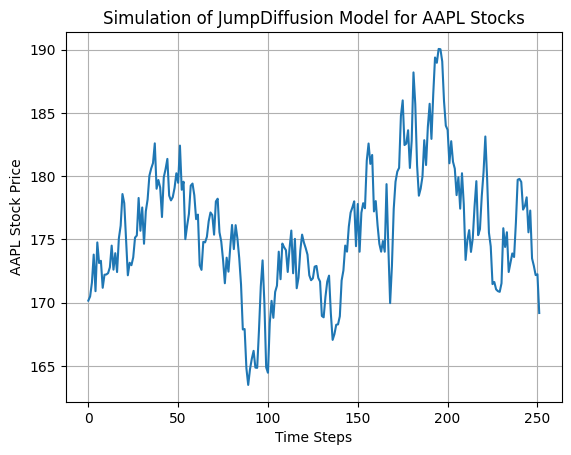

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define functions for the JumpDiffusion model
def jump_diffusion_model(S0, r, sigma, lamda, mu, delta_t, num_steps):
    """
    Simulates the JumpDiffusion model for AAPL stocks.

    Parameters:
    - S0: Initial stock price of AAPL
    - r: Risk-free interest rate
    - sigma: Volatility of AAPL stock
    - lamda: Intensity of jump arrivals
    - mu: Mean jump size
    - delta_t: Time step size
    - num_steps: Number of steps in the simulation

    Returns:
    - stock_prices: Array of simulated stock prices of AAPL over time
    """
    stock_prices = np.zeros(num_steps)
    stock_prices[0] = S0

    for i in range(1, num_steps):
        z1 = np.random.normal(0, 1)
        z2 = np.random.normal(0, 1)
        N = np.random.poisson(lamda * delta_t)

        stock_prices[i] = stock_prices[i-1] * (1 + r * delta_t + sigma * np.sqrt(delta_t) * z1)
        stock_prices[i] += stock_prices[i-1] * (mu - 0.5 * sigma**2) * N * delta_t
        stock_prices[i] += stock_prices[i-1] * sigma * np.sqrt(N * delta_t) * z2

    return stock_prices

# Define parameters for the JumpDiffusion model
S0 = 170.16  # Initial stock price of AAPL
r = 0.05  # Risk-free interest rate
sigma = 0.2  # Volatility of AAPL stock
lamda = 0.1  # Intensity of jump arrivals
mu = 0.05  # Mean jump size
delta_t = 1/252  # Time step size (daily data)
num_steps = 252  # Number of steps in the simulation (1 year)

# Generate simulated stock prices using the JumpDiffusion model
stock_prices = jump_diffusion_model(S0, r, sigma, lamda, mu, delta_t, num_steps)

# Obtain current market prices of AAPL stocks and options
current_stock_price = stock_prices[-1]
current_option_price = 9.35  # Example: Jun17 $170 Call option price

# Compare market prices with predicted prices
predicted_option_price = stock_prices[-1] - stock_prices[-2]  # Example: Predicted option price based on price convergence
price_difference = current_option_price - predicted_option_price

# Output the comparison results
print(f"Current AAPL stock price: ${current_stock_price}")
print(f"Current option price: ${current_option_price}")
print(f"Predicted option price: ${predicted_option_price}")
print(f"Price difference: ${price_difference}")

# Plot the simulated stock prices
plt.plot(stock_prices)
plt.xlabel('Time Steps')
plt.ylabel('AAPL Stock Price')
plt.title('Simulation of JumpDiffusion Model for AAPL Stocks')
plt.grid(True)

# Determine whether to buy or sell the stock based on the price difference
if price_difference > 0:
    print("Consider selling the stock.")
elif price_difference < 0:
    print("Consider buying the stock.")
else:
    print("No specific recommendation. Monitor the market closely.")

# Show the plot of simulated stock prices
plt.show()

plt.show()
